### Module yang diperlukan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

### Pemahaman Dataset

In [ ]:
print("="*50)
print("PEMAHAMAN DATASET")
print("="*50)

# Load dataset
# Asumsikan dataset disimpan sebagai '50_Startups.csv'
df = pd.read_csv('50_Startups.csv')

# Tampilkan 5 data pertama
print("\nSampel data:")
print(df.head(10))

PEMAHAMAN DATASET

Sampel data:
   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
5  131876.90        99814.71        362861.36    New York  156991.12
6  134615.46       147198.87        127716.82  California  156122.51
7  130298.13       145530.06        323876.68     Florida  155752.60
8  120542.52       148718.95        311613.29    New York  152211.77
9  123334.88       108679.17        304981.62  California  149759.96


In [ ]:
print("="*50)
print("INFORMASI DATASET")
print("="*50)
print(df.info())

INFORMASI DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None


In [ ]:
print("="*50)
print("STATISTIK DESKRIPTIF")
print("="*50)
print(df.describe())

STATISTIK DESKRIPTIF
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000


### Eksplorasi Data Dan Pra-pemrosesan

In [ ]:
print("="*50)
print("CEK MISSING VALUES")
print("="*50)
print(df.isnull().sum())

CEK MISSING VALUES
R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


Interpretasi:

pada gambar diatas, tidak terdapat Missing Values pada dataset.

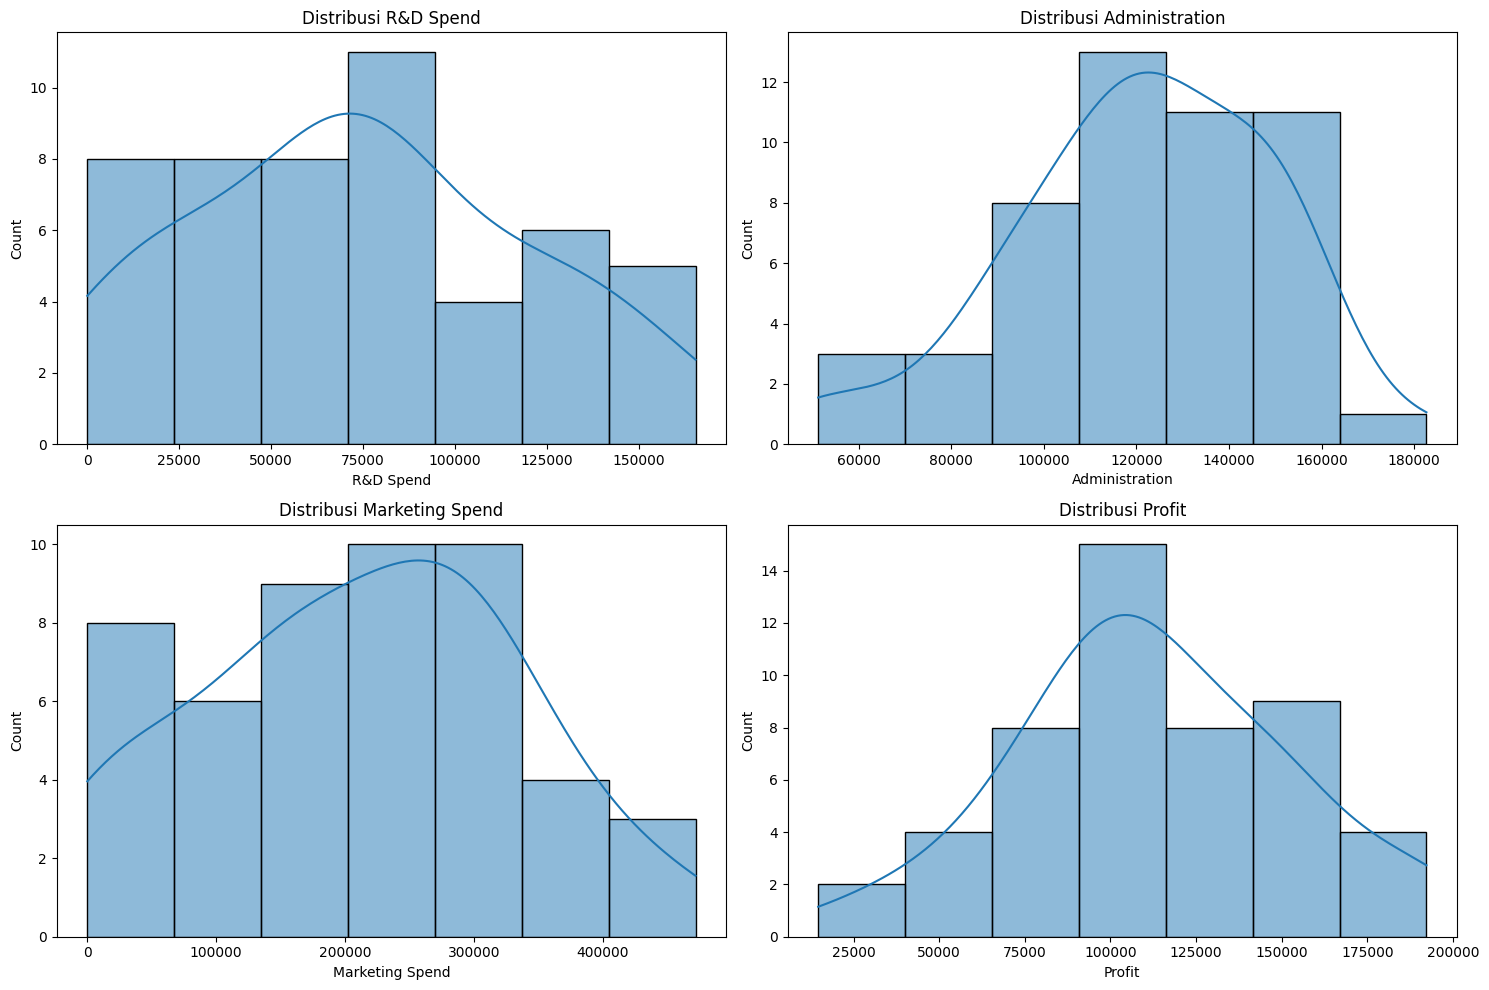

In [ ]:
# Visualisasi distribusi
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['R&D Spend'], kde=True)
plt.title('Distribusi R&D Spend')

plt.subplot(2, 2, 2)
sns.histplot(df['Administration'], kde=True)
plt.title('Distribusi Administration')

plt.subplot(2, 2, 3)
sns.histplot(df['Marketing Spend'], kde=True)
plt.title('Distribusi Marketing Spend')

plt.subplot(2, 2, 4)
sns.histplot(df['Profit'], kde=True)
plt.title('Distribusi Profit')

plt.tight_layout()
# plt.savefig('distribusi_variabel.png')
plt.show()  # Menampilkan plot distribusi
plt.close()


Interpretasi:

Pada output, menunjukkan distribusi empat variabel utama dalam dataset.
R&D Spend dan Marketing Spend cenderung positively skewed, menunjukkan
bahwa sebagian besar perusahaan mengalokasikan dana dalam jumlah sedang,
tetapi ada beberapa yang menghabiskan jauh lebih besar. Administration
memiliki distribusi yang lebih mendekati normal, dengan puncak di sekitar
120.000 - 140.000. Profit menunjukkan distribusi yang hampir simetris,
mengindikasikan bahwa sebagian besar perusahaan memiliki profit di kisaran
100.000 - 125.000. Secara keseluruhan, pola distribusi ini dapat membantu
memahami bagaimana pengeluaran di berbagai kategori berkorelasi dengan
profitabilitas perusahaan.

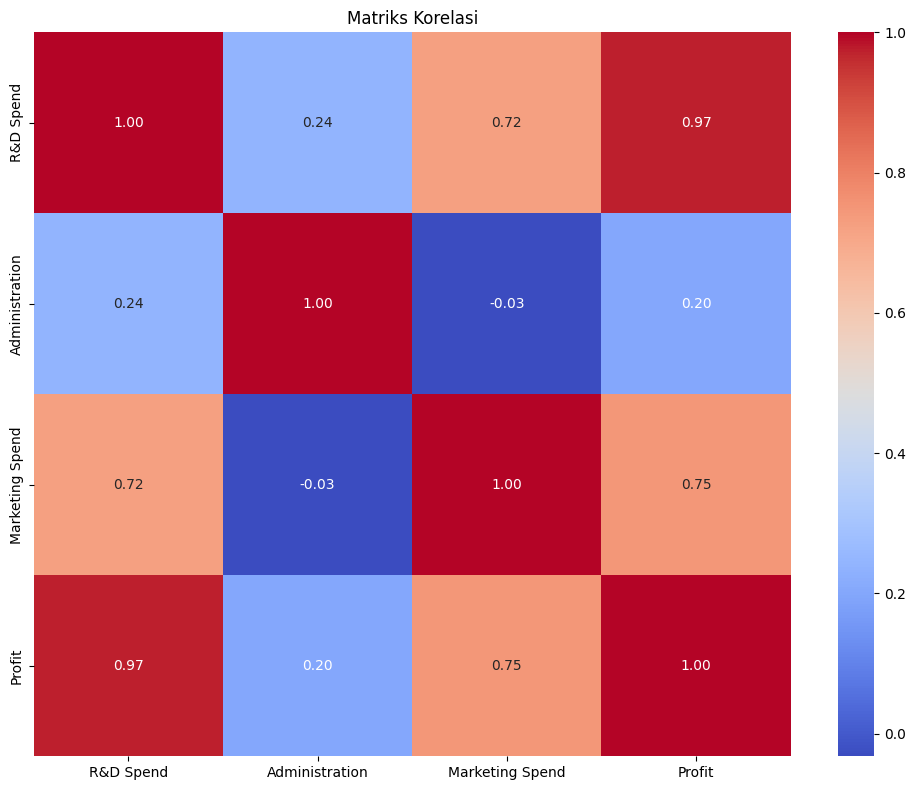

In [ ]:
# Visualisasi hubungan antara variabel - HANYA UNTUK KOLOM NUMERIK
plt.figure(figsize=(10, 8))
# Gunakan hanya kolom numerik untuk korelasi
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation = numeric_df.corr()

# Visualisasi dengan heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.tight_layout()
plt.show()  # Menampilkan plot korelasi
plt.close()

Interpretasi:

Pada output diatas, R&D Spend memiliki korelasi sangat kuat dengan
Profit (0.97), menunjukkan bahwa investasi dalam penelitian berkontribusi besar
terhadap profit. Marketing Spend juga berpengaruh positif (0.75), meskipun tidak
sekuat R&D Spend. Sementara itu, Administration memiliki korelasi rendah
dengan Profit (0.20), menunjukkan dampak yang minimal. Hubungan antara
Administration dan Marketing Spend (-0.03) hampir nol, menandakan tidak ada
keterkaitan linier yang signifikan.

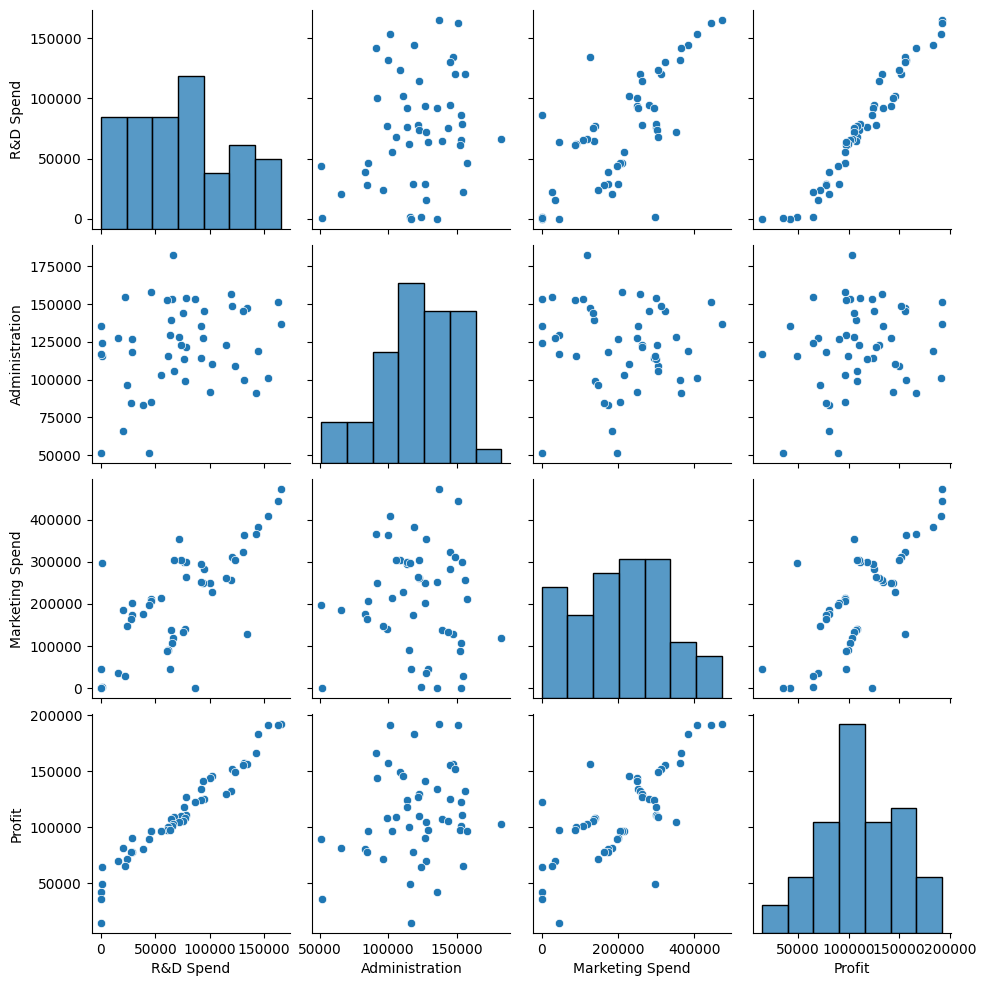

In [ ]:
# Hubungan Distribusi data antar fitur dan label
sns.pairplot(df)
plt.show()

Interpretasi:

Pada Plot pairplot diatas, menunjukkan hubungan antara variabel R&D
Spend, Administration, Marketing Spend, dan Profit. Terlihat bahwa R&D
Spend memiliki hubungan linear yang kuat dengan Profit, ditandai dengan pola
titik
yang membentuk garis diagonal ke atas. Marketing Spend juga
menunjukkan korelasi positif dengan Profit, meskipun tidak sekuat R&D Spend.
Sementara itu, Administration tidak menunjukkan hubungan yang jelas dengan
variabel lainnya, terlihat dari sebaran titik yang acak. Distribusi masing-masing
variabel juga ditampilkan dalam histogram di sepanjang diagonal, menunjukkan
variasi data di setiap fitur.

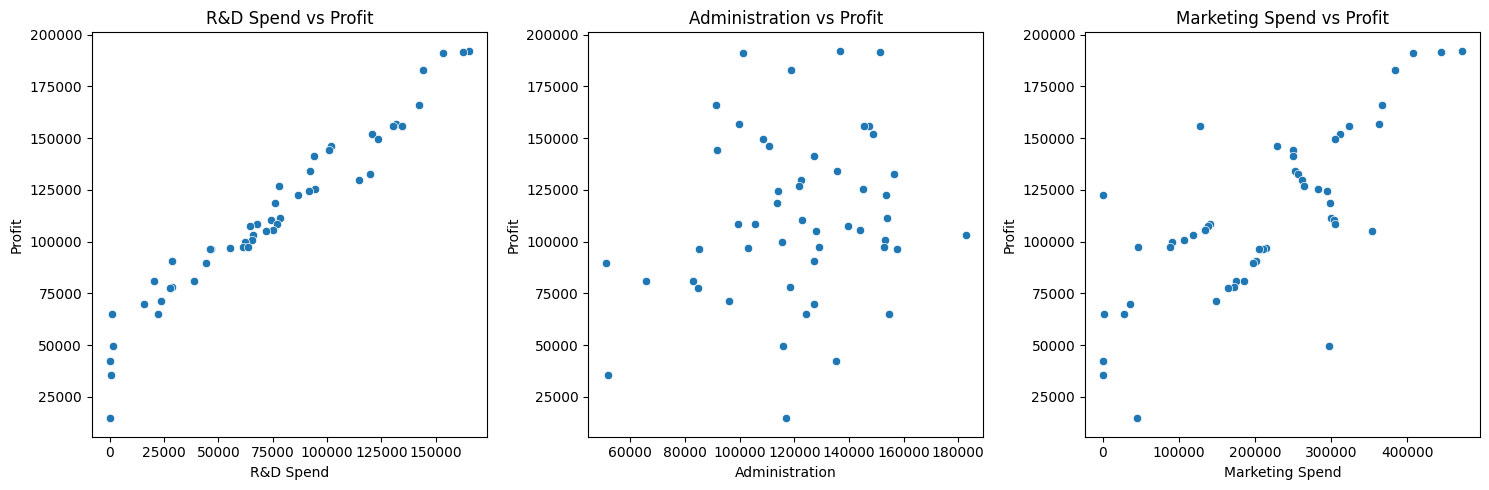

In [ ]:
# Scatter plots untuk setiap feature vs profit
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='R&D Spend', y='Profit', data=df)
plt.title('R&D Spend vs Profit')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Administration', y='Profit', data=df)
plt.title('Administration vs Profit')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Marketing Spend', y='Profit', data=df)
plt.title('Marketing Spend vs Profit')

plt.tight_layout()
# plt.savefig('scatter_plots.png')
plt.show()  # Menampilkan scatter plots
plt.close()

Interpretasi:

Pada output di atas, Scatter plot menunjukkan bahwa pengeluaran untuk
R&D memiliki hubungan positif yang kuat dengan profit, ditunjukkan oleh pola
titik yang membentuk tren linear. Sebaliknya, pengeluaran untuk administrasi
tidak menunjukkan hubungan yang jelas dengan profit, karena titik-titiknya
tersebar tanpa pola tertentu. Sementara itu, pengeluaran untuk pemasaran
memiliki hubungan positif dengan profit, meskipun tidak sekuat hubungan antara
R&D dan profit.

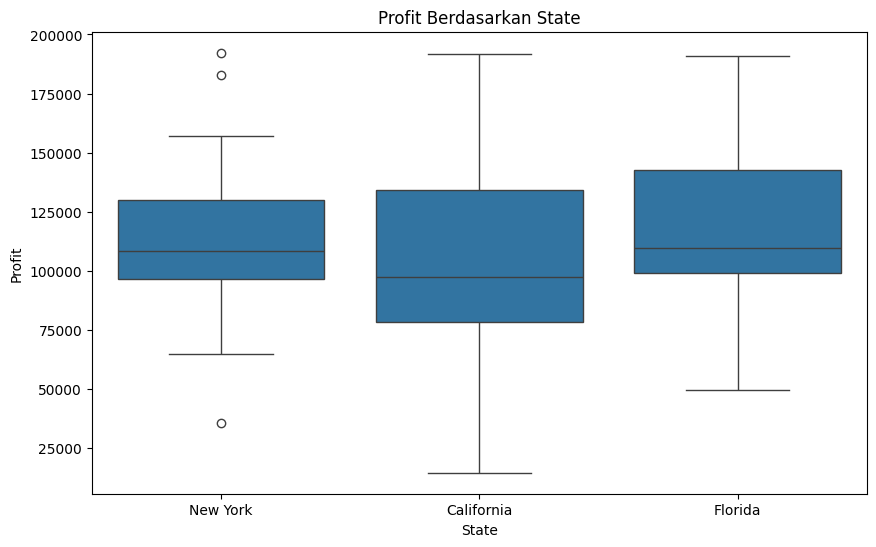

In [ ]:
# Visualisasi profit berdasarkan state
plt.figure(figsize=(10, 6))
sns.boxplot(x='State', y='Profit', data=df)
plt.title('Profit Berdasarkan State')
# plt.savefig('profit_per_state.png')
plt.show()  # Menampilkan boxplot
plt.close()

Intepretasi:

Pada output di atas, Boxplot menunjukkan distribusi profit di tiga state:
New York, California, dan Florida. California memiliki rentang profit yang lebih
luas dibandingkan dua state lainnya, menunjukkan variabilitas profit yang lebih
tinggi. Median profit di California lebih rendah dibandingkan Florida, tetapi
memiliki pencilan yang lebih tinggi. New York memiliki distribusi yang lebih
rapat dengan beberapa pencilan di bagian atas dan bawah, menunjukkan adanya
beberapa perusahaan dengan profit yang sangat tinggi atau rendah dibandingkan
mayoritas. Secara keseluruhan, Florida dan California memiliki profit yang lebih
stabil dibandingkan New York.

In [ ]:
# Split data menjadi features dan target
X = df.drop('Profit', axis=1)
y = df['Profit']

# One-hot encoding untuk variabel kategorikal (State)
categorical_features = ['State']
numeric_features = ['R&D Spend', 'Administration', 'Marketing Spend']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print("\nData telah dibagi menjadi:")
print(f"- Data training: {X_train.shape[0]} sampel")
print(f"- Data testing: {X_test.shape[0]} sampel")


Data telah dibagi menjadi:
- Data training: 35 sampel
- Data testing: 15 sampel


Interpretasi:

Gambar menunjukkan pembagian dataset, di mana 35 sampel digunakan untuk training
dan 15 sampel untuk testing, dengan rasio 70:30 menggunakan train_test_split.

### Pembangunan Model

Kode ini membangun Linear Regression dan Polynomial Regression dengan GridSearchCV untuk mencari hyperparameter terbaik berdasarkan Mean Squared Error (MSE). Model Linear Regression diuji dengan fit_intercept (True/False), sementara Polynomial Regression dieksplorasi untuk derajat 2 hingga 5 dengan variasi interaction-only terms dan fit_intercept. Setiap model dievaluasi menggunakan MSE, RMSE, MAE, dan R² untuk membandingkan performanya.

In [ ]:
param_grid_lr = {
    'regressor__fit_intercept': [True, False],
}
linear_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

grid_lr = GridSearchCV(linear_pipe, param_grid_lr, scoring='neg_mean_squared_error', cv=5)
grid_lr.fit(X_train, y_train)
y_pred_lr = grid_lr.best_estimator_.predict(X_test)

print("\nLinear Regression Metrics:")
print(f"Best Parameters: {grid_lr.best_params_}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lr):.4f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_lr):.4f}")
print(f"R-squared Score: {r2_score(y_test, y_pred_lr):.4f}")

y_pred_poly_degree = []

# GridSearch untuk Polynomial Regression dengan berbagai derajat
for degree in range(2, 6):
    print(f"\nImplementasi Polynomial Regression (degree={degree}):")

    poly_pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('poly', PolynomialFeatures()),
        ('regressor', LinearRegression())
    ])

    param_grid_poly = {
        'poly__degree': [degree],
        'poly__interaction_only': [True, False],
        'regressor__fit_intercept': [True, False]
    }
    grid_poly = GridSearchCV(poly_pipe, param_grid_poly, scoring='neg_mean_squared_error', cv=5)
    grid_poly.fit(X_train, y_train)

    y_pred_poly = grid_poly.best_estimator_.predict(X_test)
    y_pred_poly_degree.append(y_pred_poly)

    print(f"Best Parameters: {grid_poly.best_params_}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_poly):.4f}")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_poly)):.4f}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_poly):.4f}")
    print(f"R-squared Score: {r2_score(y_test, y_pred_poly):.4f}")



Linear Regression Metrics:
Best Parameters: {'regressor__fit_intercept': True}
Mean Squared Error: 84826955.0353
Root Mean Squared Error: 9210.1550
Mean Absolute Error: 7395.4335
R-squared Score: 0.9397

Implementasi Polynomial Regression (degree=2):
Best Parameters: {'poly__degree': 2, 'poly__interaction_only': True, 'regressor__fit_intercept': False}
Mean Squared Error: 97922059.2286
Root Mean Squared Error: 9895.5576
Mean Absolute Error: 9139.2124
R-squared Score: 0.9304

Implementasi Polynomial Regression (degree=3):
Best Parameters: {'poly__degree': 3, 'poly__interaction_only': False, 'regressor__fit_intercept': True}
Mean Squared Error: 25735619326.3971
Root Mean Squared Error: 160423.2506
Mean Absolute Error: 80920.0208
R-squared Score: -17.2911

Implementasi Polynomial Regression (degree=4):
Best Parameters: {'poly__degree': 4, 'poly__interaction_only': False, 'regressor__fit_intercept': True}
Mean Squared Error: 6337058448.2409
Root Mean Squared Error: 79605.6433
Mean Absolut

Interpretasi:

Pada output di atas, dapat di lihat berdasarkan hasil evaluasi, regresi linear
memiliki performa yang cukup baik dengan nilai R-squared sebesar 0.9397,
menunjukkan bahwa model mampu menjelaskan sekitar 93.97% variabilitas data. Pada
regresi polinomial, model dengan derajat 2 memiliki performa terbaik dengan R-squared
sebesar 0.9304, yang hampir setara dengan regresi linear. Namun, ketika derajat
polinomial meningkat (derajat 3 ke atas), performa model justru menurun drastis,
ditandai dengan meningkatnya error dan nilai R-squared yang negatif. Hal ini
menunjukkan bahwa model mengalami overfitting, di mana model menjadi terlalu
kompleks dan tidak mampu melakukan generalisasi dengan baik pada data uji.

### Analisis Hasil

In [ ]:
def evaluate_model(y_true, y_pred, model_name=None):
    """
    Comprehensive model evaluation function
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    if model_name:
        print(f"\nEvaluasi Model {model_name}:")
        print(f"Mean Squared Error (MSE): {mse:.4f}")
        print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
        print(f"Mean Absolute Error (MAE): {mae:.4f}")
        print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")
        print(f"R² Score: {r2:.4f}")

    return {
        'Model': model_name or 'Unnamed Model',
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape,
        'R2': r2
    }

# Evaluasi Model
metrics = []

# 1. Evaluasi Linear Regression
print("\n=== EVALUASI LINEAR REGRESSION ===")
metrics.append(evaluate_model(y_test, y_pred_lr, "Linear Regression"))


=== EVALUASI LINEAR REGRESSION ===

Evaluasi Model Linear Regression:
Mean Squared Error (MSE): 84826955.0353
Root Mean Squared Error (RMSE): 9210.1550
Mean Absolute Error (MAE): 7395.4335
Mean Absolute Percentage Error (MAPE): 0.0893%
R² Score: 0.9397


Interpretasi:

Pada output di atas, dapat dilihat evaluasi regresi linear menunjukkan
model memiliki MSE sebesar 84.826.955,03 dan RMSE 9.210,16, menandakan
tingkat kesalahan prediksi. MAE sebesar 7.395,43 menunjukkan rata-rata deviasi
absolut, sementara MAPE yang sangat kecil (0,0893%) menunjukkan akurasi
tinggi. Dengan R² sebesar 0,9397, model mampu menjelaskan 93,97% variabilitas
data, menandakan performa prediksi yang sangat baik.

In [ ]:
# 2. Evaluasi Polynomial Regression
print("\n=== EVALUASI POLYNOMIAL REGRESSION ===")
for degree in range(2, 6):
  index = degree - 2
  metrics.append(evaluate_model(y_test, y_pred_poly_degree[index], f"Polynomial (degree={degree})"))

# Konversi ke DataFrame untuk visualisasi
metrics_df = pd.DataFrame(metrics)


=== EVALUASI POLYNOMIAL REGRESSION ===

Evaluasi Model Polynomial (degree=2):
Mean Squared Error (MSE): 97922059.2286
Root Mean Squared Error (RMSE): 9895.5576
Mean Absolute Error (MAE): 9139.2124
Mean Absolute Percentage Error (MAPE): 0.0853%
R² Score: 0.9304

Evaluasi Model Polynomial (degree=3):
Mean Squared Error (MSE): 25735619326.3971
Root Mean Squared Error (RMSE): 160423.2506
Mean Absolute Error (MAE): 80920.0208
Mean Absolute Percentage Error (MAPE): 1.3921%
R² Score: -17.2911

Evaluasi Model Polynomial (degree=4):
Mean Squared Error (MSE): 6337058448.2409
Root Mean Squared Error (RMSE): 79605.6433
Mean Absolute Error (MAE): 41791.5915
Mean Absolute Percentage Error (MAPE): 0.5240%
R² Score: -3.5039

Evaluasi Model Polynomial (degree=5):
Mean Squared Error (MSE): 6063615434.9339
Root Mean Squared Error (RMSE): 77869.2201
Mean Absolute Error (MAE): 44847.2048
Mean Absolute Percentage Error (MAPE): 0.6806%
R² Score: -3.3096


Interpretasi:

Pada output di atas, dapar di lihat hasil evaluasi Model polinomial derajat
2 memiliki performa terbaik (R² = 0,9304). Derajat lebih tinggi (≥3) menunjukkan
overfitting dengan kesalahan prediksi meningkat dan R² negatif.


In [ ]:
# 3. Tampilkan Tabel Perbandingan Metrik Model
print("\n=== TABEL PERBANDINGAN METRIK MODEL ===")
print(metrics_df.to_string(index=False))


=== TABEL PERBANDINGAN METRIK MODEL ===
                Model          MSE          RMSE          MAE     MAPE         R2
    Linear Regression 8.482696e+07   9210.154995  7395.433532 0.089299   0.939711
Polynomial (degree=2) 9.792206e+07   9895.557550  9139.212385 0.085270   0.930404
Polynomial (degree=3) 2.573562e+10 160423.250579 80920.020787 1.392137 -17.291117
Polynomial (degree=4) 6.337058e+09  79605.643319 41791.591546 0.524016  -3.503947
Polynomial (degree=5) 6.063615e+09  77869.220074 44847.204752 0.680648  -3.309603


Intepretasi:

Regresi linear dan polinomial derajat 2 memiliki performa terbaik dengan
R² sekitar 0,93. Model polinomial dengan derajat ≥3 mengalami overfitting,
ditunjukkan oleh R² negatif dan peningkatan drastis pada MSE, RMSE, serta
MAE.

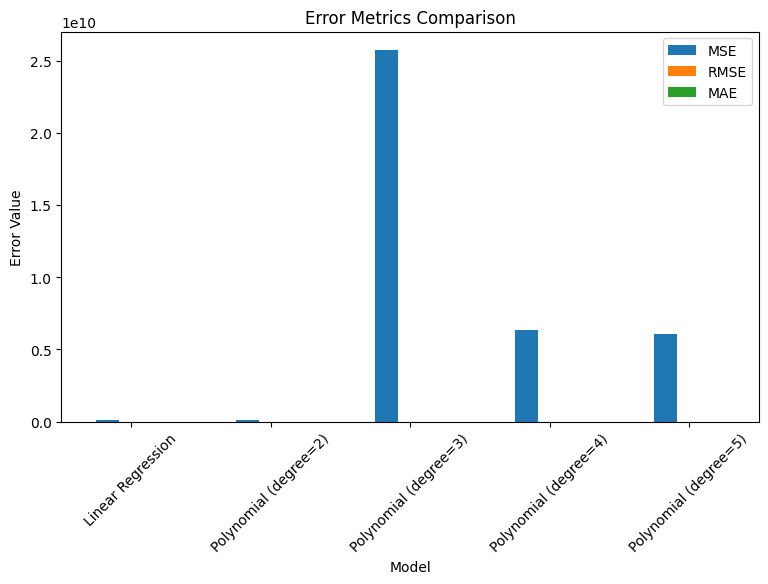

In [ ]:
# 4. Visualisasi Perbandingan Metrik Error
plt.figure(figsize=(15, 10))
error_metrics = ['MSE', 'RMSE', 'MAE']

plt.subplot(2, 2, 1)
metrics_df.plot(x='Model', y=error_metrics, kind='bar', ax=plt.gca(), rot=45)
plt.title('Error Metrics Comparison')
plt.ylabel('Error Value')
plt.legend(loc='best')
plt.tight_layout()

Intepretasi:

Grafik menunjukkan bahwa regresi polinomial derajat ≥3 mengalami
peningkatan drastis pada MSE, RMSE, dan MAE, mengindikasikan overfitting.
Sementara itu, regresi linear dan polinomial derajat 2 memiliki error yang jauh
lebih kecil, menunjukkan performa yang lebih stabil dan akurat.

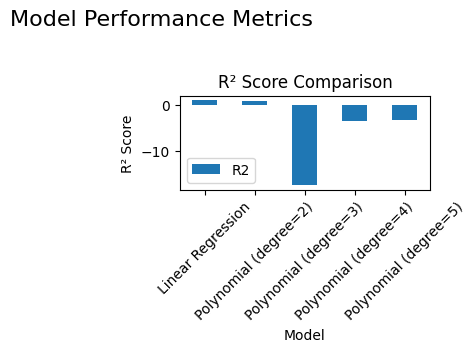

In [ ]:
# 5. Visualisasi R² Score
plt.subplot(2, 2, 2)
metrics_df.plot(x='Model', y=['R2'], kind='bar', ax=plt.gca(), rot=45)
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.tight_layout()

plt.suptitle('Model Performance Metrics', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Intepretasi:

Grafik menunjukkan bahwa regresi linear dan polinomial derajat 2
memiliki nilai R2R^2R2 mendekati 1, menandakan performa yang baik.
Sebaliknya, model polinomial dengan derajat ≥3 memiliki nilai R2R^2R2 negatif,
menunjukkan overfitting parah dan kegagalan dalam generalisasi data.

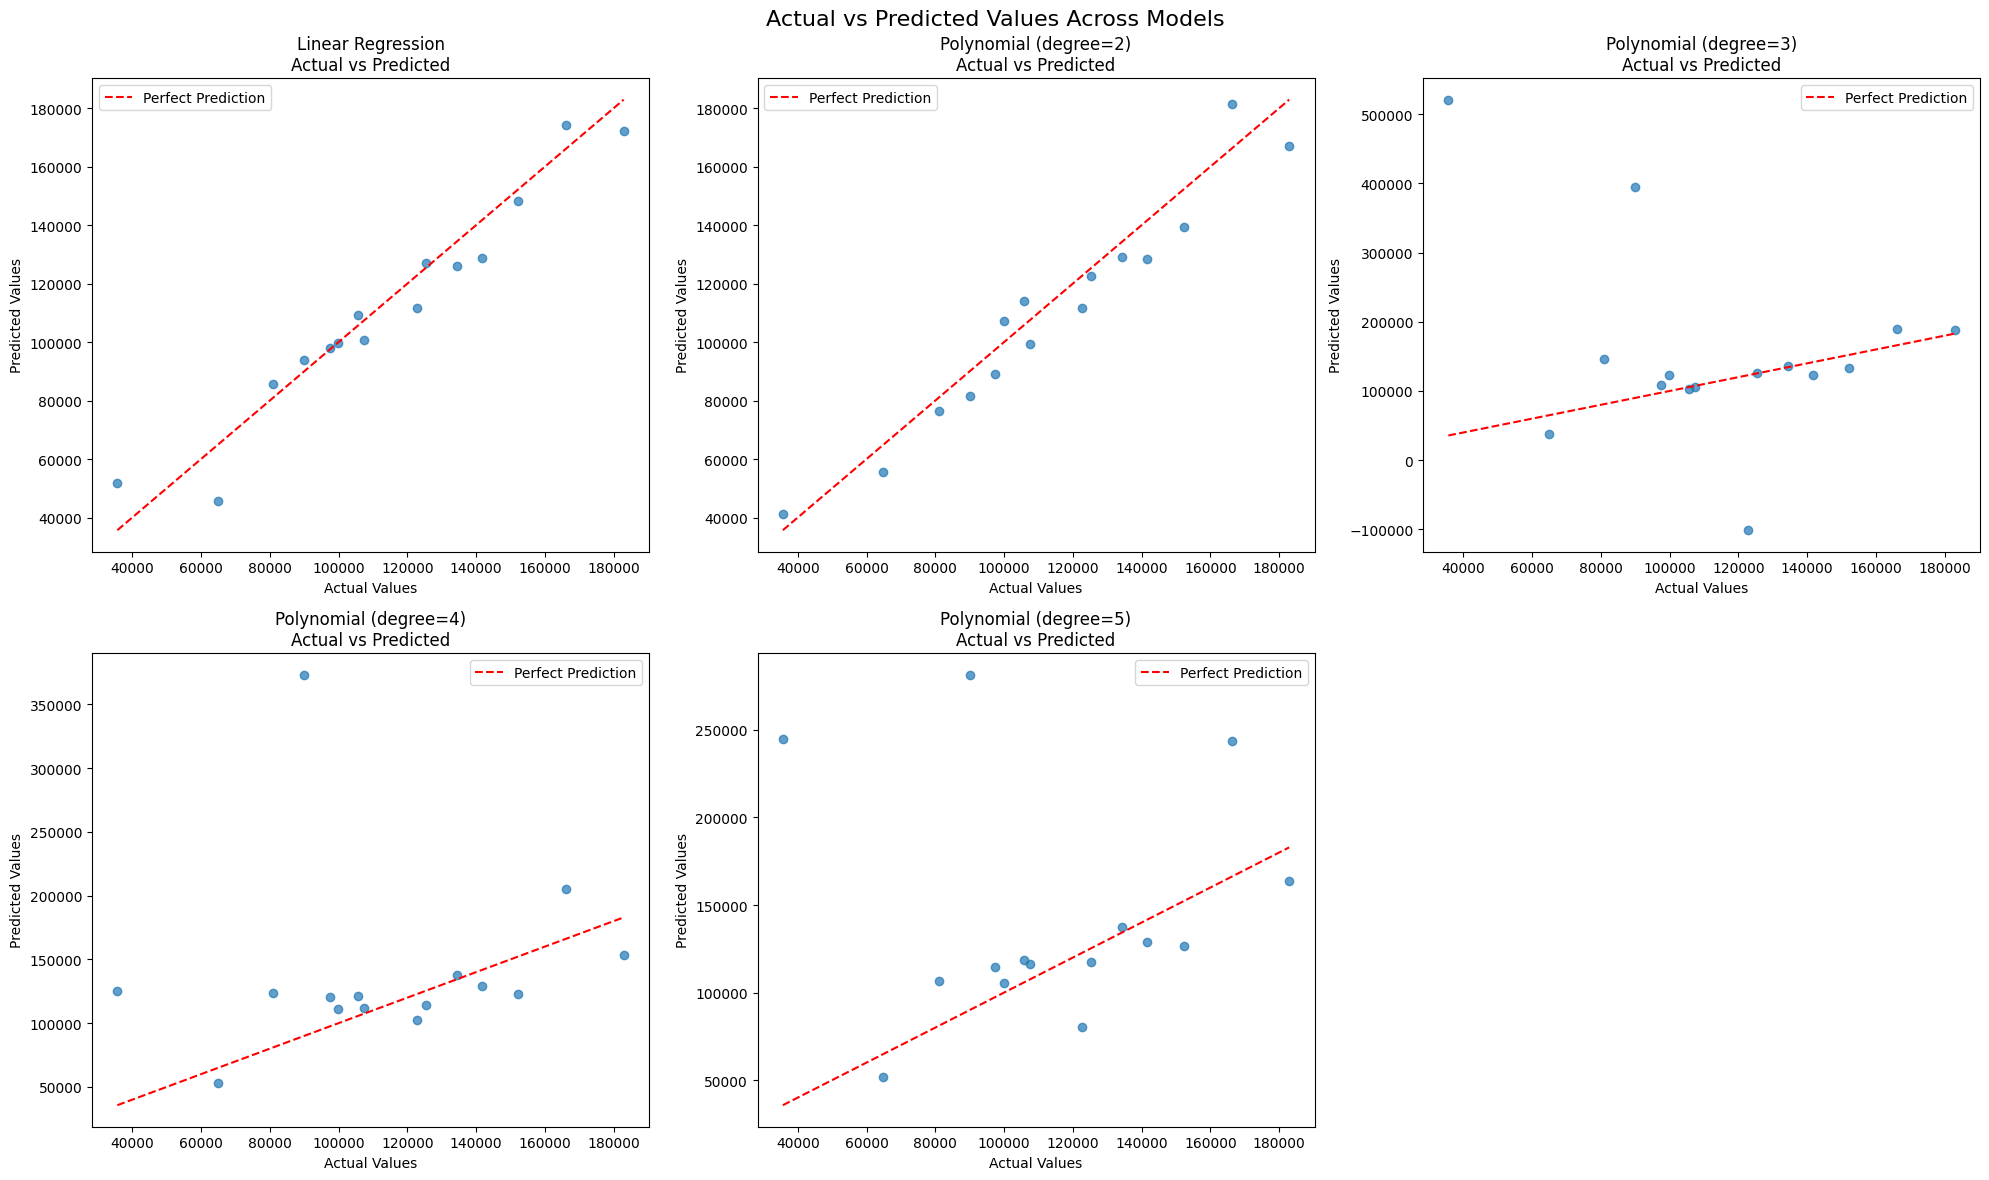

In [ ]:
# 6. Visualisasi Actual vs Predicted
plt.figure(figsize=(20, 12))

predictions = [y_pred_lr] + [y_pred_poly_degree[index_degree] for index_degree in range(0, 4)]
model_names = ['Linear Regression'] + [f'Polynomial (degree={degree})' for degree in range(2, 6)]

for i, (pred, name) in enumerate(zip(predictions, model_names), 1):
    plt.subplot(2, 3, i)
    plt.scatter(y_test, pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
    plt.title(f'{name}\nActual vs Predicted', fontsize=12)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()

plt.suptitle('Actual vs Predicted Values Across Models', fontsize=16)
plt.tight_layout()
plt.show()


Intepretasi:

Pada output di atas, Grafik menunjukkan bahwa regresi linear dan polinomial
derajat 2 memiliki prediksi yang paling mendekati garis ideal (garis merah putus-putus).
Sebaliknya, model polinomial dengan derajat ≥3 menunjukkan penyebaran yang semakin
jauh dari garis ideal, menandakan prediksi yang buruk dan overfitting yang signifikan.

In [ ]:
# 7. Identifikasi Model Terbaik
best_model = metrics_df.loc[metrics_df['R2'].idxmax()]
print("\n=== MODEL TERBAIK ===")
print(f"Model Terbaik: {best_model['Model']}")
print("Alasan:")
print(f"- Memiliki R² Tertinggi: {best_model['R2']:.4f}")
print(f"- MSE Terendah: {best_model['MSE']:.4f}")
print(f"- RMSE Terendah: {best_model['RMSE']:.4f}")


=== MODEL TERBAIK ===
Model Terbaik: Linear Regression
Alasan:
- Memiliki R² Tertinggi: 0.9397
- MSE Terendah: 84826955.0353
- RMSE Terendah: 9210.1550


Intepretasi:

Regresi linear dipilih sebagai model terbaik karena memiliki R² tertinggi
(0,9397), menunjukkan kecocokan terbaik dengan data. Selain itu, model ini
memiliki nilai MSE dan RMSE terendah, menandakan kesalahan prediksi yang
lebih kecil dibandingkan model lainnya.

In [ ]:
# Analisis variabel yang paling berpengaruh
print("\nVariabel yang paling berpengaruh terhadap profit berdasarkan analisis korelasi:")
most_correlated = correlation['Profit'].drop('Profit').abs().sort_values(ascending=False)
for var, corr in most_correlated.items():
    print(f"{var}: {corr:.4f}")


Variabel yang paling berpengaruh terhadap profit berdasarkan analisis korelasi:
R&D Spend: 0.9729
Marketing Spend: 0.7478
Administration: 0.2007


Intepretasi:

Berdasarkan analisis korelasi diatas, variabel yang paling berpengaruh
terhadap profit adalah R&D Spend dengan korelasi sebesar 0.9729, menunjukkan
hubungan yang sangat kuat. Marketing Spend juga berpengaruh dengan korelasi
0.7478, namun tidak sekuat R&D Spend. Sementara itu, Administration
memiliki pengaruh paling lemah dengan korelasi 0.2007, menandakan kontribusi
yang kecil terhadap profit.


### Kesimpulan

In [ ]:
print("\n")
print("="*50)
print("KESIMPULAN")
print("="*50)

# Tentukan model terbaik berdasarkan R2 score
models = ['Linear Regression', 'Polynomial (degree=2)', 'Polynomial (degree=3)', 'Polynomial (degree=4)', 'Polynomial (degree=5)']
r2_scores = [
    r2_score(y_test, y_pred_lr),
    r2_score(y_test, y_pred_poly_degree[0]),
    r2_score(y_test, y_pred_poly_degree[1]),
    r2_score(y_test, y_pred_poly_degree[2]),
    r2_score(y_test, y_pred_poly_degree[3])
]
best_model_index = r2_scores.index(max(r2_scores))
best_model = models[best_model_index]

print(f"\nModel terbaik adalah {best_model} dengan R² Score: {max(r2_scores):.4f}")

# Analisis variabel yang paling berpengaruh
# Catatan: Untuk melakukan ini, Anda perlu menambahkan analisis korelasi sebelumnya
# Misalnya dengan menggunakan correlation = X_train.corr() sebelum pembagian train-test
print("\nVariabel yang paling berpengaruh:")
try:
    # Tambahkan bagian ini jika Anda memiliki correlation matrix
    most_correlated = correlation['target'].drop('target').abs().sort_values(ascending=False)
    for var, corr in most_correlated.items():
        print(f"{var}: {corr:.4f}")
except:
    print("Catatan: Analisis korelasi tambahan diperlukan untuk mendetail variabel berpengaruh")

print("\nInterpretasi hasil:")
print("1. Model Regresi:")
for model, r2 in zip(models, r2_scores):
    print(f"   - {model}: R² = {r2:.4f}")

print("\n2. Kesimpulan Utama:")
print(f"   - Model terbaik adalah {best_model} dengan kemampuan menjelaskan variasi data sebesar {max(r2_scores)*100:.2f}%")

if best_model_index > 0:
    print("   - Penggunaan regresi polinomial menunjukkan bahwa hubungan antara variabel")
    print("     prediktor dan target bersifat non-linear")
else:
    print("   - Model linear mampu menjelaskan hubungan antara variabel prediktor dengan baik")

print("\n3. Rekomendasi:")
print("   - Validasi model dengan data baru")
print("   - Pertimbangkan penggunaan teknik regularisasi untuk mencegah overfitting")
print("   - Lakukan uji validasi silang untuk memastikan konsistensi model")



KESIMPULAN

Model terbaik adalah Linear Regression dengan R² Score: 0.9397

Variabel yang paling berpengaruh:
Catatan: Analisis korelasi tambahan diperlukan untuk mendetail variabel berpengaruh

Interpretasi hasil:
1. Model Regresi:
   - Linear Regression: R² = 0.9397
   - Polynomial (degree=2): R² = 0.9304
   - Polynomial (degree=3): R² = -17.2911
   - Polynomial (degree=4): R² = -3.5039
   - Polynomial (degree=5): R² = -3.3096

2. Kesimpulan Utama:
   - Model terbaik adalah Linear Regression dengan kemampuan menjelaskan variasi data sebesar 93.97%
   - Model linear mampu menjelaskan hubungan antara variabel prediktor dengan baik

3. Rekomendasi:
   - Validasi model dengan data baru
   - Pertimbangkan penggunaan teknik regularisasi untuk mencegah overfitting
   - Lakukan uji validasi silang untuk memastikan konsistensi model
